In [ ]:
aved to results/
[05:17:20 gpu 1.1G ram 3.5G idx 0]     Step:9696/9700 val_loss:7.8028 val_acc:0.5068
[05:17:21 gpu 1.1G ram 3.5G idx 0] Results saved to results/cifar_muon_embed512_lr0.1000_wd0.0000_steps9700_4d8ad8a85ca15219.json

In [40]:
"""
Takes results path and plots some observable over time, specified at the bottom of the script.
"""
import os
os.environ["JAX_PLATFORMS"] = "cpu"

import matplotlib.pyplot as plt
import json
import dotenv
from pathlib import Path

root_path = '/om2/user/zaho/modula-v2'
path = Path(root_path) / "experiment/results/" / "cifar_muon_embed512_lr0.0500_wd0.0050_steps38800_2b519eb224922309.json"

with open(path, "r") as f:
    json_data = json.load(f)
    log = json_data["results"]

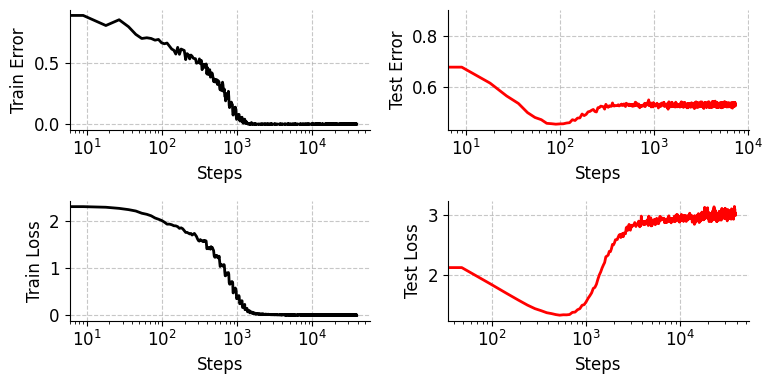

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with 4 subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 4))
# Set the font size to 12pt for all text elements
plt.rcParams.update({'font.size': 12})

axs = axs.flatten()

# Plot each metric
metrics = ['train_accuracies', 'accuracies', 'losses', 'val_losses']
titles = ['Train Error', 'Test Error', 'Train Loss', 'Test Loss']
colors = ['black', 'red', 'black', 'red']

for i, (metric, title, color) in enumerate(zip(metrics, titles, colors)):
    if metric in log:
        # Get the data
        data = np.array(log[metric])
        steps = np.arange(len(data))

        if 'accuracies' in metric:
            data = 1 - data # switch to error

        if 'val' in metric:
            val_interval = json_data['parameters']['val_interval']
            steps = steps * val_interval
        else:
            log_interval = json_data['parameters']['log_interval']
            steps = steps * log_interval

        # Plot
        axs[i].plot(steps, data, color=color, linewidth=2)
        #axs[i].set_title(title, fontsize=14)
        axs[i].set_xlabel('Steps', fontsize=12)
        axs[i].set_ylabel(title, fontsize=12)
        axs[i].grid(True, linestyle='--', alpha=0.7)
        # Set x-axis to log scale
        axs[i].set_xscale('log')

        # if 'accuracies' in metric:
        #     axs[i].set_ylim(0, 1)
        
        # Add some styling
        axs[i].spines['top'].set_visible(False)
        axs[i].spines['right'].set_visible(False)

plt.tight_layout()
plt.show()